In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

df = pd.read_csv('crypto_data.csv')

In [29]:
df

Unnamed: 0        CoinName Algorithm  IsTrading ProofType  \
0            42         42 Coin    Scrypt       True   PoW/PoS   
1           365         365Coin       X11       True   PoW/PoS   
2           404         404Coin    Scrypt       True   PoW/PoS   
3           611       SixEleven   SHA-256       True       PoW   
4           808             808   SHA-256       True   PoW/PoS   
...         ...             ...       ...        ...       ...   
1247        XBC     BitcoinPlus    Scrypt       True       PoS   
1248       DVTC      DivotyCoin    Scrypt      False   PoW/PoS   
1249       GIOT     Giotto Coin    Scrypt      False   PoW/PoS   
1250       OPSC  OpenSourceCoin   SHA-256      False   PoW/PoS   
1251       PUNK       SteamPunk       PoS      False       PoS   

      TotalCoinsMined TotalCoinSupply  
0        4.199995e+01              42  
1                 NaN      2300000000  
2        1.055185e+09       532000000  
3                 NaN          611000  
4        0.000000e+00               0  
...               ...             ...  
1247     1.283270e+05         1000000  
1248     2.149121e+07       100000000  
1249              NaN       233100000  
1250              NaN        21000000  
1251              NaN        40000000  

[1252 rows x 7 columns]

In [30]:
cleaned_df = df.where(df['IsTrading'] == True) \
    .where(df['TotalCoinsMined'] > 0) \
    .dropna()
cleaned_df.drop(columns = ['IsTrading', 'Unnamed: 0', 'CoinName'], inplace = True)
cleaned_df.head()

Algorithm ProofType  TotalCoinsMined TotalCoinSupply
0    Scrypt   PoW/PoS     4.199995e+01              42
2    Scrypt   PoW/PoS     1.055185e+09       532000000
5       X13   PoW/PoS     2.927942e+10    314159265359
7   SHA-256       PoW     1.792718e+07        21000000
8    Ethash       PoW     1.076842e+08               0

In [31]:
dummy_df = pd.get_dummies(data=cleaned_df, columns=['Algorithm', 'ProofType'])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(dummy_df)
x_scaled.shape

(532, 98)

In [37]:
pca = PCA(n_components = .951)
pca_df = pca.fit_transform(x_scaled)
pca_df.shape

(532, 80)

In [40]:
tsne = TSNE(perplexity=50)
features = tsne.fit_transform(pca_df)
features.shape

(532, 2)

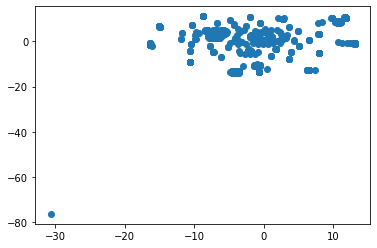

In [43]:
x = features[:,0]
y = features[:,1]
plt.scatter(x,y)
plt.show()

In [55]:
arr = []
kmeans = [i for i in range(1,20)]

for i in kmeans:
    x = KMeans(n_clusters = i, random_state = 0)
    x.fit(pca_df)
    arr.append(x.inertia_)

C:\Users\jackc\anaconda3\envs\pythondata\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


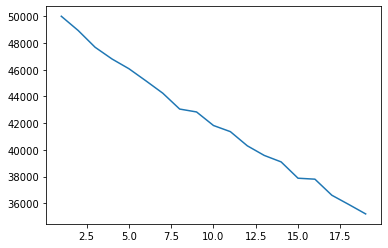

In [56]:
plt.plot(kmeans, arr)
plt.show()

### Recomendations Based on Analysis

Running t-SNE after reducing our noise with a Principal Component Analysis revealed one primary cluster with a few outliers. Then using k-means to find the point at which our clusters smooth out showed some promise at k=8 but I then expanded it from 10 to 20 cluster and it shows a remarkable consistent downward trend suggesting this clustering is a fundamentally flawed approach to analyzing this dataset.